In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

from scipy import signal
from animation import animate_convolution

%matplotlib inline
sym.init_printing()



plt.rcParams['animation.html'] = 'jshtml'

class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

def plot_signals(x_axis, x, h, ylabel, xlabel):
    plt.rcParams['figure.figsize'] = 7, 2

    p1 = sym.plot(x, (x_axis, -5, 5), show=False,
                  line_color='C0', ylabel=ylabel, xlabel=xlabel,legend=True, label = '$x$')
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='C1',legend=True, label = '$h$')
    p1.extend(p2)
    p1.show()
    
from pole_zero_plot import pole_zero_plot as pzmapZ

def pzmapS(poles, zeros, ax=None):
    mR = -2
    MR = 2
    mI = -2
    MI = 2
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
        if complex(pole).real < mR:
            mR = complex(pole).real
        if complex(pole).real > MR:
            MR = complex(pole).real
        if complex(pole).imag < mI:
            mI = complex(pole).imag
        if complex(pole).imag > MI:
            MI = complex(pole).imag
            
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
        if complex(zero).real < mR:
            mR = complex(zero).real
        if complex(zero).real > MR:
            MR = complex(zero).real
        if complex(zero).imag < mI:
            mI = complex(zero).imag
        if complex(zero).imag > MI:
            MI = complex(zero).imag

            
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.axis([mR*1.1, MR*1.1, mI*1.1, MI*1.1])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()



# Análisis de sistemas LTI



## Causalidad

La [propiedad de causalidad](https://en.wikipedia.org/wiki/Causality) establece que puede percibirse un efecto en la salida de un sistema únicamente después de haber sido excitado. Matemáticamente pueden encontrarse modelos de sistemas que violen la causalidad, sin embargo no pueden implementarse, pues se requeriría conocer el futuro de las señales de entrada.

A continuación se discute sobre la respuesta de un sistemas LTI ante una entrada $x(t)$ desde la operación de convolución:

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}

In [2]:
t, tau = sym.symbols('t tau', real=True)
x = sym.Rational(3, 4) * rect(t - 1/2)


### Respuesta impulsional de dos lados

Un sistema hipotético cuya respuesta impulsional sea de dos lados, es decir, que tenga valores diferentes de cero antes y después del instante $t=0$, tendrá que conocer el futuro de la señal de entrada. Observe las gráficas de convolución.

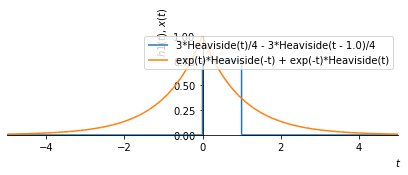

In [3]:
h1 = sym.exp(-t) * sym.Heaviside(t) + sym.exp(t) * sym.Heaviside(-t)

plot_signals(t, x, h1, r'$h1(t)$, $x(t)$', r'$t$')


In [4]:

y1 = sym.integrate(h1.subs(t,t-tau) * x.subs(t, tau), (tau, 0, t))

anim1 = animate_convolution(x, h, y, t, tau, np.arange(-2, 5, 1), np.arange(-5, 5, 1))
anim1


KeyboardInterrupt: 

### Respuesta impulsional antes de $t=0$

Un sistema hipotético cuya respuesta impulsional se presenta antes del instante $t=0$ tendrá que conocer el futuro de la señal de entrada. Observe las gráficas de convolución.

In [ ]:
h2 = sym.exp(t) * sym.Heaviside(-t)

plot_signals(t, x, h2, r'$h2(t)$, $x(t)$', r'$t$')


In [ ]:
y2 = sym.integrate(h2.subs(t,t-tau) * x.subs(t, tau), (tau, 0, t))

anim2 = animate_convolution(x, h2, y2, t, tau, np.arange(-2, 5, .1), np.arange(-5, 5, 0.1))
anim2

### Respuesta impulsional después de $t=0$

Un sistema hipotético cuya respuesta impulsional se presenta después del instante $t=0$ tendrá que conocer el pasado de la señal de entrada. Observe las gráficas de convolución.

In [ ]:
h3 = sym.exp(-t) * sym.Heaviside(t)

plot_signals(t, x, h3, r'$h3(t)$, $x(t)$', r'$t$')

In [ ]:
y3 = sym.integrate(h3.subs(t,t-tau) * x.subs(t, tau), (tau, 0, t))

anim3 = animate_convolution(x, h3, y3, t, tau, np.arange(-2, 5, .1), np.arange(-5, 5, 0.02))
anim3

Del estudio de la transformada de Laplace se obtuvo que las señales causales están asociadas a **regiones de convergencia** tales que:

\begin{equation}
\Re \{ s \} > \Re \{ - s_0 \} 
\end{equation}

Lo cual se obtiene cuando hay al menos la misma cantidad de polos que de ceros. A continuación algunos ejemplos de funciones de transferencia causales y no causales.


| Función                  | causal o no causal|
|--------------------------|-------------------|
|$\frac{1}{s+2}$           | Causal            |
|$\frac{s-1}{s+2}$         | Causal            |
|$\frac{s+1}{s^2 + 3s +2}$ | Causal            |
|$\frac{s^2 + 3s +2}{s+1}$ | No Causal         |
|$\frac{s+1}{2}$           | No Causal         |



## Causalidad en sistemas de tiempo discreto

Con base en la relación expuesta entre la transformada de Laplace y la transformada $z$, puede deducirse que la función de transferencia debe cumplir la misma condición en cuanto a la cantidad de polos y ceros. Además, el modelo como ecuación en diferencias muestra directamente la dependencia de valores futuros de las señales.



**Ejemplo 1** 
Suponga la siguiente función de transferencia $F(z)=\frac{Y(z)}{X(z)}$

\begin{equation}
F(z) = \frac{Y(z)}{X(z)} = \frac{z-0.2}{z-0.5}
\end{equation}

Esta tiene la misma cantidad de polos y ceros. LLevándola a ecuación en diferencias se obtiene:

\begin{align}
\frac{Y(z)}{X(z)} &= \frac{z-0.2}{z-0.5} \\
Y(z) \cdot (z-0.5) &= X(z) \cdot (z-0.2) \\
z \cdot Y(z) - 0.5 \cdot Y(z)  &= z \cdot X(z) - 0.2 \cdot X(z) \\
y[k+1] -0.5 \cdot y[k] &= x[k+1] - 0.2 \cdot x[k]
\end{align}



Esta ecuación en diferencias puede desplazarse al instante $\kappa = k+1$

\begin{equation}
y[k+1] -0.5 \cdot y[k] = x[k+1] - 0.2 \cdot x[k] \\
y[\kappa] -0.5 \cdot y[\kappa-1] = x[\kappa] - 0.2 \cdot x[\kappa-1]
\end{equation}

De esta última puede despejarse la salida $y$ retomando la variable independiente $k$ para facilidad.

\begin{equation}
y[k] = 0.5 \cdot y[k-1] + x[k] - 0.2 \cdot x[k-1]
\end{equation}

Esta ecuación muestra que se encuentra el valor actual de salida $y[k]$ a partir del conocimiento del valor de salida en el instante anterior $y[k-1]$, el valor actual de entrada $x[k]$ y el valor anterior de entrada $x[k-1]$


**Ejemplo 2** 
Suponga la siguiente función de transferencia $F(z)=\frac{Y(z)}{X(z)}$

\begin{equation}
F(z) = \frac{Y(z)}{X(z)} = \frac{z^2-0.2}{z-0.5}
\end{equation}

Esta tiene la misma cantidad de polos y ceros. LLevándola a ecuación en diferencias se obtiene:

\begin{align}
\frac{Y(z)}{X(z)} &= \frac{z^2-0.2}{z-0.5} \\
Y(z) \cdot (z-0.5) &= X(z) \cdot (z^2-0.2) \\
z \cdot Y(z) - 0.5 \cdot Y(z)  &= z^2 \cdot X(z) - 0.2 \cdot X(z) \\
y[k+1] -0.5 \cdot y[k] &= x[k+2] - 0.2 \cdot x[k]
\end{align}


Si esta ecuación en diferencias se desplaza al instante $\kappa = k+1$

\begin{equation}
y[k+1] -0.5 \cdot y[k] = x[k+2] - 0.2 \cdot x[k] \\
y[\kappa] -0.5 \cdot y[\kappa-1] = x[\kappa+1] - 0.2 \cdot x[\kappa-1]
\end{equation}

Al despejarse la salida $y$ retomando la variable independiente $k$ para facilidad.

\begin{equation}
y[k] = 0.5 \cdot y[k-1] + x[k+1] - 0.2 \cdot x[k-1]
\end{equation}

Esta ecuación muestra que se encuentra el valor actual de salida $y[k]$ a partir del conocimiento del valor de salida en el instante anterior $y[k-1]$, el valor de entrada en el instante futuro $x[k+1]$ y el valor anterior de entrada $x[k-1]$

Si esta ecuación en diferencias se desplaza al instante $\kappa = k+2$

\begin{equation}
y[k+1] -0.5 \cdot y[k] = x[k+2] - 0.2 \cdot x[k] \\
y[\kappa - 1] -0.5 \cdot y[\kappa - 2] = x[\kappa] - 0.2 \cdot x[\kappa-2]
\end{equation}

En este caso no puede despejarse la salida $y$. Además, se observa que el valor actual de entrada $x[k]$ solo puede relacionarse con valores anteriores de la salida $y$


## Estabilidad en sistemas causales

Un sistema se considera estable si tiene la propiedad de tranformar la energía de manera que es capaz de llegar a equilibrio. En términos de señales, esto se traduce en la capacidad de responder de manera acotada ante cualquier entrada acotada. Esta es la condición de estabilidad [BIBO](https://en.wikipedia.org/wiki/BIBO_stability).

Suponga un sistema tal que la señal de salida $y(t) = \mathcal{H} \{ x(t) \}$. Este sistema es estable si se cumple que:

\begin{align}
|x(t)| &< B_x \\
|y(t)| &< B_y
\end{align}

Gráficamente se representa así:

![BIBO](figuras/BIBO_stability.png)

Partiendo de la respuesta impulsional del sistema se tiene que:

\begin{equation}
|y(t)| = \left| \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau \right|
\end{equation}

Considerando $B_x$ como la mayor norma posible para la entrada $x(t)$, se tiene que:

\begin{equation}
|y(t)| \leq \int_{-\infty}^{\infty} |x(\tau)| \cdot |h(t-\tau)| \; d\tau < \int_{-\infty}^{\infty} B_x \cdot |h(t-\tau)| \; d\tau
\end{equation}

Si $y(t)$ también es acotada significa que la respuesta impulsional es [absolutamente integrable](https://en.wikipedia.org/wiki/Absolutely_integrable_function), y por ende acotada.

\begin{equation}
\int_{-\infty}^{\infty} |h(t)| \; dt < B_h
\end{equation}

Lo anterior implica que un sistema es estable si la respuesta impulsional es absolutamente integrable.

Como la transformada de la señal exponencial compleja y causal es
\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot e^{-s_0 t} \} = \frac{1}{s + s_0} \qquad \forall s : \Re \{ s \} > \Re \{ - s_0 \}
\end{equation}

y las señales exponenciales son absolutamente integrables cuando la parte real del exponente es negativa, puede deducirse que un sistema es estable si los polos de la respuesta impulsional (su función de transferencia) tienen parte real negativa.

Los sistemas con polos de parte real positiva serán pues inestables.

A continuación algunos ejemplos de modelos estables e inestables.

|Función              | polos        | ceros    | Estabilidad |
|---------------------|--------------|----------|---------------------|
| \begin{equation} \frac{1}{s+1}\end{equation}      |\begin{equation} s = -1\end{equation}       | \begin{equation} s = []\end{equation}   | estable             |
| \begin{equation} \frac{1}{s-1}\end{equation}     |\begin{equation} s = 1\end{equation}        | \begin{equation} s = []\end{equation}   | inestable           |
| \begin{equation} \frac{1}{s^2+2s+1}\end{equation}|\begin{equation} s = -1 \\ s = -1\end{equation}    | \begin{equation} s = []\end{equation}   | estable             |
| \begin{equation} \frac{1}{s^2+s+1}\end{equation} |\begin{equation} s = -\frac{1}{2}+j\cdot \frac{\sqrt{3}}{2} \\ s =-\frac{1}{2}-j\cdot \frac{\sqrt{3}}{2} \end{equation}  | \begin{equation} s = []\end{equation}   | estable             |
| \begin{equation} \frac{s-1}{s^2+s+1}\end{equation} |\begin{equation} s = -\frac{1}{2}+j\cdot \frac{\sqrt{3}}{2} \\ s =-\frac{1}{2}-j\cdot \frac{\sqrt{3}}{2} \end{equation}  |\begin{equation} s = 1\end{equation}| estable             |

Suponga que $h(t) = \mathcal{L}^{-1} \{ H(s) \}$ es la respuesta impulsional de un sistema de segundo orden con función de transferencia $H(s)$

**Sistema estable**

\begin{equation}
H(s) = \frac{1}{(s-s_\infty)(s-s^*_\infty)}
\end{equation}

Suponga que $s_\infty= -1 + j$ y $s^*_\infty$ es su complejo conjugado.

In [ ]:
s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)
s_inf = -1 + 0*sym.I

H3 = 1/((s - s_inf)*(s - sym.conjugate(s_inf)))
h3 = sym.inverse_laplace_transform(H3, s, t)
h3

La respuesta al impulso se grafica

In [ ]:
sym.plot(h3, (t, 0, 10), xlabel='$t$', ylabel='$h3(t)$');

También el mapa de polos y ceros

In [ ]:
pzmapS(sym.roots(sym.denom(H3), s), sym.roots(sym.numer(H3), s))


Note además que

\begin{equation}
\int_{-\infty}^{\infty} | \epsilon(t) e^{-t} \sin(t) | \; dt = \int_{0}^{\infty} | e^{-t} \sin(t) | \; dt < \int_{0}^{\infty} | e^{-t} | \; dt = 1
\end{equation}

**Sistema inestable**

\begin{equation}
H(s) = \frac{1}{(s-s_\infty)(s-s^*_\infty)}
\end{equation}

Suponga que $s_\infty= 1 + j$ y $s^*_\infty$ es su complejo conjugado.

In [ ]:
s_inf = 1 + sym.I

H4 = 1/((s - s_inf)*(s - sym.conjugate(s_inf)))
h4 = sym.inverse_laplace_transform(H4, s, t)
h4

La respuesta al impulso se grafica

In [ ]:
sym.plot(h4, (t, 0, 10), xlabel='$t$', ylabel='$h4(t)$');

También en mapa de polos y ceros

In [ ]:
pzmapS(sym.roots(sym.denom(H4), s), sym.roots(sym.numer(H4), s))


Note además que

\begin{equation}
\int_{-\infty}^{\infty} | \epsilon(t) e^{t} \sin(t) | \; dt = \int_{0}^{\infty} | e^{t} \sin(t) | \; dt \rightarrow \text{no converge}
\end{equation}

## Estabilidad en sistemas de tiempo discreto

Con base en la relación expuesta entre la transformada de Laplace y la transformada $z$, puede deducirse que la función de transferencia debe cumplir con la condición de ubicación de sus polos afectando la ubicación con el periodo de muestreo.

\begin{equation}
X_\text{s}(s) = X(z) \big\rvert_{z = e^{s T}}
\end{equation}

Así, los sistemas estables tienen sus polos dentro de la circunferencia de radio unitario y los inestables por fuera.


**Sistema estable**

\begin{equation}
H(z) = \frac{z}{z-0.5}
\end{equation}



Se grafica la respuesta al impulso.

In [ ]:
num = [1,0]
den =[1,-0.5]

H5 = (num, den)

t, y = signal.dimpulse((num,den,1),n=30)

plt.stem(t, np.squeeze(y))

y el mapa de polos y ceros

In [ ]:
pzmapZ(sym.roots(den), sym.roots(num))


**Sistema inestable**

\begin{equation}
H(z) = \frac{0.5}{z^2+0.2z+0.5}
\end{equation}

In [ ]:
num = [0.5]
den =[1,0.2,0.5]

H5 = (num, den)

t, y = signal.dimpulse((num,den,1),n=30)

plt.stem(t, np.squeeze(y))

y el mapa de polos y ceros

In [ ]:
pzmapZ(sym.roots(den), sym.roots(num))


## Amortiguamiento

De acuerdo con los análisis realizados a la transformada de Laplace y la transformada $z$, se presentan oscilaciones en las respuestas impulsionales solamente cuando los polos tienen parte imaginaria. El amortiguamiento es la proíedad de los sistemas para extraer la energía de sí permitiendo o no que sus elementos internos oscilen. 

- Sistemas sobreamortiguados: No oscilan y sus polos tienen parte imaginaria igual a cero.
- Sistemas subamortiguados: Oscilan y sus polos tienen parte imaginaria distinta de cero.
- Sistemas críticamente amortiguados: Tiene polos reales repetidos.
